In [110]:
import pandas as pd
import regex as re
import requests

url = 'https://prts.wiki/api.php'

In [111]:
arkop = pd.read_csv('operator.csv',encoding='gbk')
arkop

,sortId,name,rarity,approach,date
0,-1,预备干员-近战,2,集成战略,2020-08-25 16:00
1,-1,预备干员-狙击,2,集成战略,2020-08-25 16:00
2,-1,预备干员-后勤,2,集成战略,2020-08-25 16:00
3,-1,预备干员-术师,2,集成战略,2020-08-25 16:00
4,-1,预备干员-重装,2,集成战略,2020-09-27 16:00
...,...,...,...,...,...
394,369,CONFESS-47,0,公开招募,2025-05-01 16:00
395,370,聆音,4,标准寻访,2025-05-01 16:00
396,371,信仰搅拌机,5,活动获得,2025-05-01 16:00
397,372,蕾缪安,5,标准寻访,2025-05-01 16:00


In [112]:
arkop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sortId    399 non-null    int64 
 1   name      399 non-null    object
 2   rarity    399 non-null    int64 
 3   approach  399 non-null    object
 4   date      399 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.7+ KB


In [113]:
star6op = arkop[(arkop['rarity']==5) & (arkop['sortId']>0)]
star6op

,sortId,name,rarity,approach,date
98,73,能天使,5,公开招募 标准寻访,2019-04-30 10:00
99,74,推进之王,5,公开招募 标准寻访,2019-04-30 10:00
100,75,伊芙利特,5,公开招募 标准寻访,2019-04-30 10:00
101,76,艾雅法拉,5,标准寻访,2019-04-30 10:00
102,77,安洁莉娜,5,标准寻访,2019-04-30 10:00
...,...,...,...,...,...
390,365,死芒,5,标准寻访,2025-03-07 16:00
393,368,Mon3tr,5,标准寻访,2025-04-07 16:00
396,371,信仰搅拌机,5,活动获得,2025-05-01 16:00
397,372,蕾缪安,5,标准寻访,2025-05-01 16:00


In [114]:
star6opname = list(star6op['name'])
star6opname

['能天使',
 '推进之王',
 '伊芙利特',
 '艾雅法拉',
 '安洁莉娜',
 '闪灵',
 '夜莺',
 '星熊',
 '塞雷娅',
 '银灰',
 '斯卡蒂',
 '陈',
 '黑',
 '赫拉格',
 '麦哲伦',
 '莫斯提马',
 '煌',
 '阿',
 '年',
 '刻俄柏',
 '风笛',
 '傀影',
 '温蒂',
 'W',
 '早露',
 '铃兰',
 '棘刺',
 '森蚺',
 '史尔特尔',
 '瑕光',
 '泥岩',
 '迷迭香',
 '山',
 '空弦',
 '嵯峨',
 '夕',
 '灰烬',
 '异客',
 '歌蕾蒂娅',
 '凯尔希',
 '浊心斯卡蒂',
 '卡涅利安',
 '帕拉斯',
 '水月',
 '假日威龙陈',
 '琴柳',
 '远牙',
 '焰尾',
 '耀骑士临光',
 '灵知',
 '老鲤',
 '令',
 '澄闪',
 '菲亚梅塔',
 '号角',
 '流明',
 '艾丽妮',
 '归溟幽灵鲨',
 '黑键',
 '多萝西',
 '鸿雪',
 '百炼嘉维尔',
 '玛恩纳',
 '白铁',
 '伺夜',
 '斥罪',
 '缄默德克萨斯',
 '焰影苇草',
 '林',
 '重岳',
 '仇白',
 '麒麟R夜刀',
 '伊内丝',
 '淬羽赫默',
 '霍尔海雅',
 '缪尔赛思',
 '圣约送葬人',
 '提丰',
 '琳琅诗怀雅',
 '纯烬艾雅法拉',
 '涤火杰西卡',
 '赫德雷',
 '止颂',
 '薇薇安娜',
 '塑心',
 '锏',
 '莱伊',
 '左乐',
 '黍',
 '艾拉',
 '阿斯卡纶',
 '魔王',
 '逻各斯',
 '维什戴尔',
 '乌尔比安',
 '妮芙',
 '娜仁图亚',
 '佩佩',
 '玛露西尔',
 '维娜·维多利亚',
 '弑君者',
 '忍冬',
 '荒芜拉普兰德',
 '引星棘刺',
 '烛煌',
 '余',
 '隐德来希',
 '死芒',
 'Mon3tr',
 '信仰搅拌机',
 '蕾缪安',
 '新约能天使']

In [115]:
params = {
    "action": "query",
    "prop": "revisions",
    "titles": star6opname[93], 
    "rvslots": "main",
    "rvprop": "content",
    "formatversion": "2",
    "format": "json"
}

response = requests.get(url, params=params)
data = response.json()

In [116]:
content = data["query"]['pages'][0]['revisions'][0]['slots']['main']['content']
print(content)

{{干员页面名|维什戴尔|Wiš'adel|ウィシャデル}}{{pathnav2|干员一览}}
{{ads/normal}}{{ads/mobile}}
{{异格干员|原型=W}}
==干员信息==
{{CharinfoV2
<!--下方为自动更新部分，您的修改可能会被覆盖-->
|干员名=维什戴尔
|干员名jp=ウィシャデル
|干员外文名=Wiš'adel
|干员id=char_1035_wisdel
|干员序号=329
|特性=攻击对小范围的{{color|#00B0FF|地面}}敌人造成{{color|#00B0FF|两次}}物理伤害（第二次为余震，伤害降低至攻击力的一半）
|稀有度=5
|职业=狙击
|分支=投掷手
|情报编号=B00W
|所属国家=
|所属组织=巴别塔
|所属团队=
|位置=远程位
|标签=输出
|画师=Liduke
|中文配音=阮从青
|日文配音=竹达彩奈
|韩文配音=朴高夽
|英文配音=Caitlyn Bairstow
|精英0介绍=维什戴尔在赦罪师的遗迹收集的行头。<br/>虽是捡来的装备，却兼顾实用性与美观性。
|精英2介绍=她依旧与爆炸为伴，以疯狂著称。<br/>但在这抹鲜红的装束之下，是笃定的决心和不可阻挡的锋芒。
|时装1名称=超新星
|时装1画师=板板
|时装1系列=忒斯特收藏/XV
|时装1颜色=#888c95
|时装1介绍=忒斯特收藏系列/超新星。维什戴尔为了解决失控的源石而踏足未知空间时的装扮。按本人的说法，既然是来清理垃圾的，那就要有相应的仪式感。
<!--上方为自动更新部分，您的修改可能会被覆盖-->
|限定=1
|精英0缩放=2
|精英0坐标x=-21
|精英0坐标y=-203
|精英2缩放=3.2
|精英2坐标x=-234
|精英2坐标y=-601
|时装1缩放=3.4
|时装1坐标x=-380
|时装1坐标y=-530
}}

==获得方式==
{{干员获得方式
|获得方式=限定寻访
|上线时间=2024-05-01 16:00
|解限时间=2025-04-01 04:00
|前缀=[[何以为我|<span style="color:#fff;background:linear-gradient(90deg,#e71717,#265794);border-radius:20px;padding-left:8p

In [117]:
def potATK(content):
    potenatk = 0
    temp = re.search(r'潜能类型=.*',content).group(0).replace('潜能类型=','').split(',')
    if 'atk' in temp:
        temp2 = re.search(r'潜能=.*',content).group(0).replace('潜能=','').split(',')
        potenatk = temp2[temp.index('atk')]
    return int(potenatk)

def modATK(content):
    modatkdict = {}
    try:
        mod1stat = {x:int(y) for x,y in (item.split(':') for item in re.search(r'模组1数据=.*',content).group(0).replace('模组1数据=','').split(';'))}
        try:
            modatkdict['m1'] = mod1stat['atk']
        except:
            modatkdict['m1'] = 0
    except:
        pass

    try:
        mod2stat = {x:int(y) for x,y in (item.split(':') for item in re.search(r'模组2数据=.*',content).group(0).replace('模组2数据=','').split(';'))}
        try:
            modatkdict['m2'] = mod2stat['atk']
        except:
            modatkdict['m2'] = 0
    except:
        pass

    try:
        mod3stat = {x:int(y) for x,y in (item.split(':') for item in re.search(r'模组3数据=.*',content).group(0).replace('模组3数据=','').split(';'))}
        try:
            modatkdict['m3'] = mod3stat['atk']
        except:
            modatkdict['m3'] = 0
    except:
        pass
    return modatkdict

In [118]:
baseatk = int(re.search(r'精英2_满级_攻击=.*',content).group(0).replace('精英2_满级_攻击=',''))
trustatk = int(re.search(r'信赖加成_攻击=.*',content).group(0).replace('信赖加成_攻击=',''))
potenatk = potATK(content)
modatk = modATK(content)

# atk = baseatk + trustatk + modatk['m1']
atk = baseatk + trustatk + modatk['m1'] + potenatk


In [119]:
[x.replace('天赋4效果=','') for x in re.findall(r'天赋4效果=.*',content)]

['攻击时对主目标的攻击力提升至125%并为其附着残影，残影受到维什戴尔的余震影响时有15%概率爆炸，对周围所有敌人造成175%攻击力的物理伤害并使其{{术语|ba.stun|晕眩}}1秒',
 '攻击时对主目标的攻击力提升至125%并为其附着残影，残影受到维什戴尔的余震影响时有15%概率爆炸，对周围所有敌人造成185%{{color|#0098DC|（+10%）}}攻击力的物理伤害并使其{{术语|ba.stun|晕眩}}1秒']

In [120]:
[x.replace('技能专精3描述=','') for x in re.findall(r'技能专精3描述=.*',content)][2]



'立刻在攻击范围内召唤{{color|#0098DC|2}}个魂灵之影（最多存在3个，技能结束后保留），攻击力{{color|#0098DC|+180%}}，攻击间隔{{color|#FF6237|大幅增大(+2.9)}}，攻击时攻击力提升至{{color|#0098DC|220%}}，溅射范围{{color|#0098DC|大幅扩大}}且第一天赋的发动概率提高至{{color|#0098DC|100%}}<br/>{{color|#F49800|攻击装有6发弹药，打完后结束（可随时停止技能）}}'

In [121]:
actskillstd = atk * (1.00 + 1.8)
actskill = actskillstd * 2.2
print('sub target:',actskill)
mainhit = actskill * 1.25
print('main target:',mainhit)
echohit = mainhit * 0.5
print('echo damage:',echohit)
# ancesexplo = actskillstd * 1.75
ancesexplo = actskillstd * 1.85
print('ancesstor explosion:',ancesexplo)
hitdmg = mainhit + 2 * echohit + 2 * ancesexplo
print('total damage per hit:',hitdmg)

sub target: 5383.84
main target: 6729.8
echo damage: 3364.9
ancesstor explosion: 4527.32
total damage per hit: 22514.239999999998


In [122]:
import matplotlib.pyplot as plt

In [123]:
defence = [x for x in range(0,5100,100)]
maindmg = [max(mainhit-d,mainhit*0.05) for d in defence]
echodmg = [2*(max(echohit-d,echohit*0.05)) for d in defence]
explodmg = [2*(max(ancesexplo-d,ancesexplo*0.05)) for d in defence]
validdmg = [max(mainhit-d,mainhit*0.05) + 2*(max(echohit-d,echohit*0.05)) + 2*(max(ancesexplo-d,ancesexplo*0.05)) for d in defence]
df = pd.DataFrame({'defence':defence,'main_hit_dmg':maindmg,'echo_hit_dmg':echodmg,'anccestor_explosion_dmg':explodmg, 'total_dmg':validdmg})
ndf = df.set_index('defence')
ndf

,main_hit_dmg,echo_hit_dmg,anccestor_explosion_dmg,total_dmg
defence,,,,
0,6729.8,6729.80,9054.640,22514.240
100,6629.8,6529.80,8854.640,22014.240
200,6529.8,6329.80,8654.640,21514.240
300,6429.8,6129.80,8454.640,21014.240
400,6329.8,5929.80,8254.640,20514.240
500,6229.8,5729.80,8054.640,20014.240
600,6129.8,5529.80,7854.640,19514.240
700,6029.8,5329.80,7654.640,19014.240
800,5929.8,5129.80,7454.640,18514.240


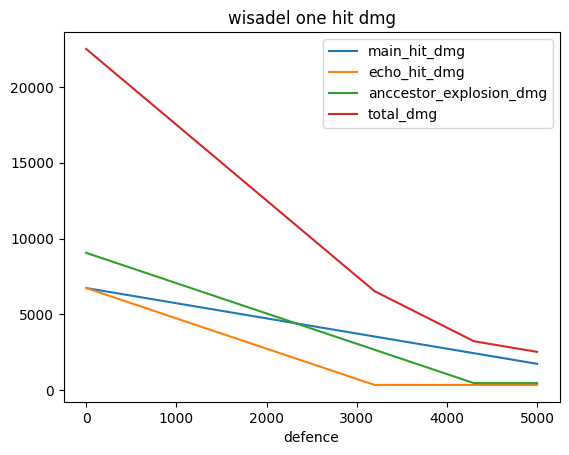

In [124]:
ndf.plot(kind='line')
plt.title('wisadel one hit dmg')
plt.show()

In [125]:
mlynar = [25 * (max(445*5*1.8*1.28-d,445*5*1.8*1.28*0.05) + 445*5*0.12) for d in defence]
wisadel = [6 * d for d in validdmg]
df = pd.DataFrame({'defence':defence,'mlynar':mlynar,'wisadel':wisadel}).set_index('defence')


<AxesSubplot: xlabel='defence'>

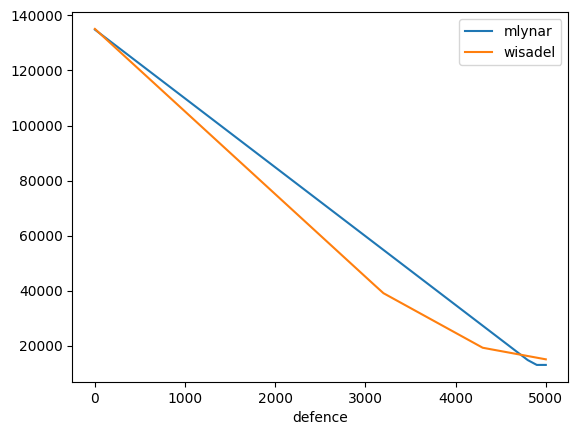

In [126]:
df.plot(kind='line')

In [127]:
mlynardps = [d/27.0 for d in mlynar]
wisadeldps = [d/25 for d in wisadel]
df = pd.DataFrame({'defence':defence,'mlynardps':mlynardps,'wisadeldps':wisadeldps}).set_index('defence')

Text(0.5, 1.0, 'dps comparison')

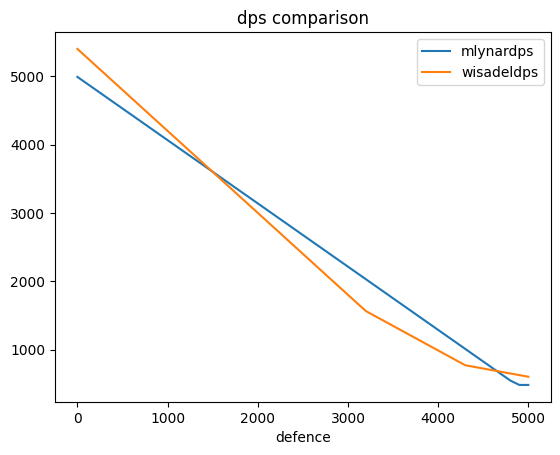

In [129]:
df.plot(kind='line')
plt.title('dps comparison')